# Intro

Data urls:

### Auto
https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv

### Boston
https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv

### Diabetes
https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv

### Gapminder
https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv

### US Congressional Voting Record
https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv

### White wine quality
https://assets.datacamp.com/production/repositories/628/datasets/2d9076606fb074c66420a36e06d7c7bc605459d4/white-wine.csv

### Red wine quality
https://assets.datacamp.com/production/repositories/628/datasets/013936d2700e2d00207ec42100d448c23692eb6f/winequality-red.csv

### Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?



a) Using labeled financial data to predict whether the value of a stock will go up or go down next week. ✅


b) Using labeled housing price data to predict the price of a new house based on various features.


c) Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.


d) Using labeled financial data to predict what the value of a stock will be next week.

# 1. Exploratory data analysis

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## 1.1. Loading dataset

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

- A bunch is similar to a dictionary.

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
iris.data.shape

(150, 4)

- We have 150 rows (or observations) and 4 columns (or features).

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 1.2. EDA

In order to perform EDA, we need to build the dataset as folow:

In [9]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1.2.1. Visual EDA 

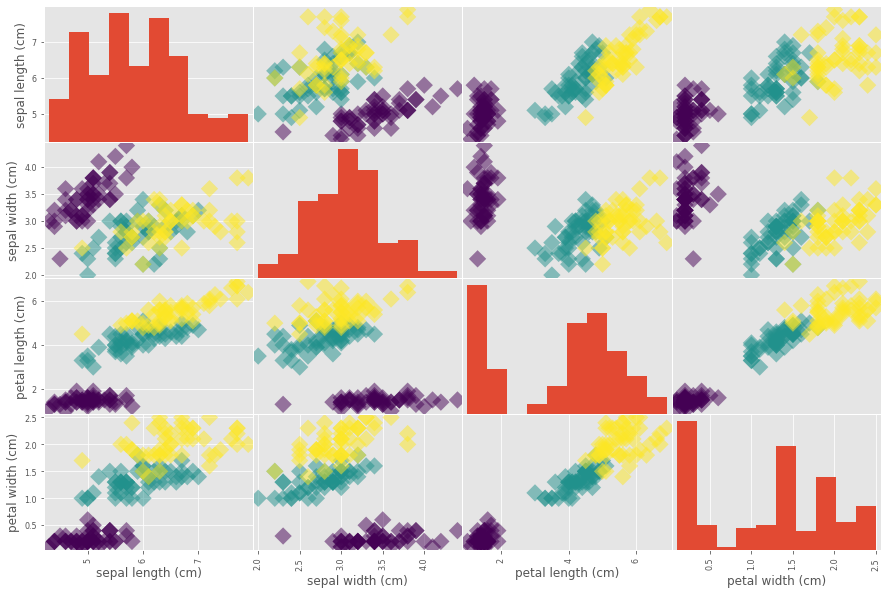

In [10]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[15,10],
                              s=150, marker='D')

## 1.3. Exercises

> **1. Numerical EDA**

In this chapter, you'll be working with a dataset obtained from the *UCI Machine Learning Repository* consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called df. Use pandas' `.head()`, `.info()`, and `.describe()` methods to explore the DataFrame.

In [11]:
votes = pd.read_csv('votes.csv')

In [12]:
df = votes.dropna()

In [13]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              232 non-null    object
 1   infants            232 non-null    object
 2   water              232 non-null    object
 3   budget             232 non-null    object
 4   physician          232 non-null    object
 5   salvador           232 non-null    object
 6   religious          232 non-null    object
 7   satellite          232 non-null    object
 8   aid                232 non-null    object
 9   missile            232 non-null    object
 10  immigration        232 non-null    object
 11  synfuels           232 non-null    object
 12  education          232 non-null    object
 13  superfund          232 non-null    object
 14  crime              232 non-null    object
 15  duty_free_exports  232 non-null    object
 16  eaa_rsa            232 non-null    object
dt

In [15]:
df.shape

(232, 17)

> **2. Visual EDA**

The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the `scatter_matrix()` function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a `countplot` of the `'education'` bill, generated from the following code:

```python    
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
```

In `sns.countplot()`, we specify the x-axis data to be `'education'`, and hue to be `'party'`. Recall that `'party'` is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly *against* this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the `'satellite'` and `'missile'` bills, and answer the following question: 

> **Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans?** 

Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlaid onto the same figure.

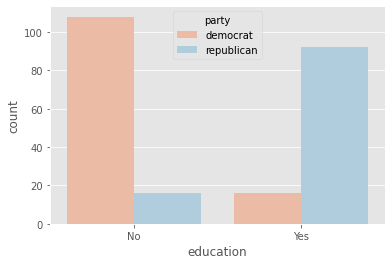

In [16]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Satellite

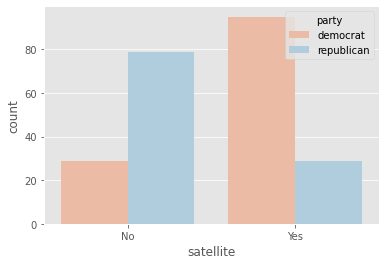

In [17]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- Missile

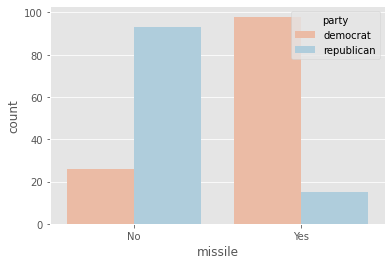

In [18]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Democrats voted in favor of both 'satellite' and 'missile'

# 2. The classification challenge

All machine learning models are implemented as Python classes in scikit-learn.

**Methods**

- `.fit()`
- `.predict()`

**Requirements to perform operations into scikit-learn**
- Targets should be numerical rather than categorical.
- Missing values are not allowed to perform scikit-learn algorithms.

## 2.1. k-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [20]:
iris['data'].shape

(150, 4)

In [21]:
iris['target'].shape # single column

(150,)

## Predicting on unlabled data

In [22]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])

In [23]:
prediction = knn.predict(X_new)

In [24]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


Remember that (0: setosa, 1: versicolor, 2: virginica). So, the prediction give us:
- versicolor
- versicolor
- setosa

## 2.2. Exercises

> **1. k-Nearest Neighbors: Fit**

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.

- Import KNeighborsClassifier from sklearn.neighbors.
- Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
- Fit the classifier to the data using the .fit() method.

In [25]:
# Converting yes to 1 and no to 0
my_map = {'y':1, 'n':0}
df1 = df.applymap(lambda x: my_map.get(x) if x in my_map else x)

In [26]:
df1.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [27]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Create arrays for the features and the response variable
y = df1['party'].values
X = df1.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

> **2. k-Nearest Neighbors: Predict**
    
    
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as df. This time, you will create the feature array X and target variable array y yourself.


- Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
- Instantiate a KNeighborsClassifier with 6 neighbors.
- Fit the classifier to the data.
- Predict the labels of the training data, X.
- Predict the label of the new data point X_new.

In [31]:
X_new = np.array([
   [0.696469,  0.286139,  0.226851,  0.551315,  0.719469,  0.423106,  0.980764,
   0.68483,  0.480932,  0.392118,  0.343178,  0.72905,  0.438572,  0.059678,
   0.398044,  0.737995]])


In [32]:
X_new

array([[0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106,
        0.980764, 0.68483 , 0.480932, 0.392118, 0.343178, 0.72905 ,
        0.438572, 0.059678, 0.398044, 0.737995]])

In [33]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df1['party'].values
X = df1.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


# 3. Measuring model performance

- How can you be sure about the model prediction?
- Accuracy is a commonly used metric in classification
    + Fraction of correct prediction

## 3.1. Train/test split

In [19]:
from sklearn.model_selection import train_test_split

- Below you can see the steps to perform train/test split and predict the labels. 

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(\"Test set predictions:\\n {}\".format(y_pred)
      
# Accuracy
knn.score(X_test, y_test)
```                                               

## 3.2. Model complexity

- Larger k = smoother decision boundary = less complexy model

## 3.3. Exercises

> **1. The digits recognition dataset**

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.


- Import datasets from sklearn and matplotlib.pyplot as plt.
- Load the digits dataset using the .load_digits() method on datasets.
- Print the keys and DESCR of digits.
- Print the shape of images and data keys using the . notation.
- Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

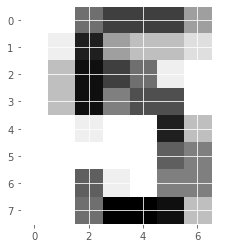

In [21]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

> **2. Train/Test Split + Fit/Predict/Accuracy**

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.


- Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
- Create an array for the features using digits.data and an array for the target using digits.target.
- Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. 
- Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
- Create a k-NN classifier with 7 neighbors and fit it to the training data.
- Compute and print the accuracy of the classifier's predictions using the .score() method.

In [25]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


> **3. Overfitting and underfitting**

Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.


Inside the for loop:
- Setup a k-NN classifier with the number of neighbors equal to k.
- Fit the classifier with k neighbors to the training data.
- Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

In [26]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [27]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

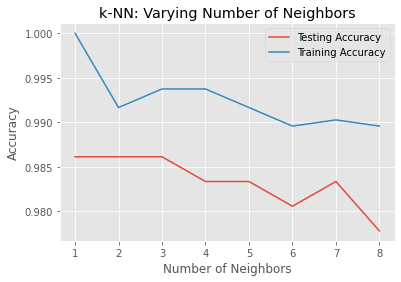

In [28]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

À medida que aumentamos o número de vizinhos, diminuímos a acurácia do modelo, tanto no conjunto de treino, quanto no conjunto de teste. 3 ou 4 vizinhos parecem ser uma boa quantidade para aumentar a acurácia do modelo. 